ПРОВЕРКА НОРМИРОВКИ ПЛОТНОСТИ
∫ φ(x) dx на [-1, 1] = 2.0000000000
Ошибка интегрирования: 2.22e-14
Условие нормировки выполнено: False

ГЕНЕРАЦИЯ ВЫБОРКИ
Размер выборки: 10000
Первые 10 значений: [-1.6414 -1.9778 -1.8698 -1.7944 -1.4268 -1.4267 -1.2667 -1.938  -1.7959
 -1.8569]

ВЕРОЯТНОСТЬ ПОПАДАНИЯ В ИНТЕРВАЛ
P(-0.5 ≤ X ≤ 0.5) = 1.375000

ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ
Математическое ожидание: 0.000000
Дисперсия: 0.200000
Среднее квадратическое отклонение: 0.447214
Коэффициент асимметрии: 0.000000
Эксцесс: -0.600000

КВАНТИЛИ И ПРОЦЕНТИЛИ
0.75-квантиль (Q0.75): -1.879385
90%-ная точка: -1.954166



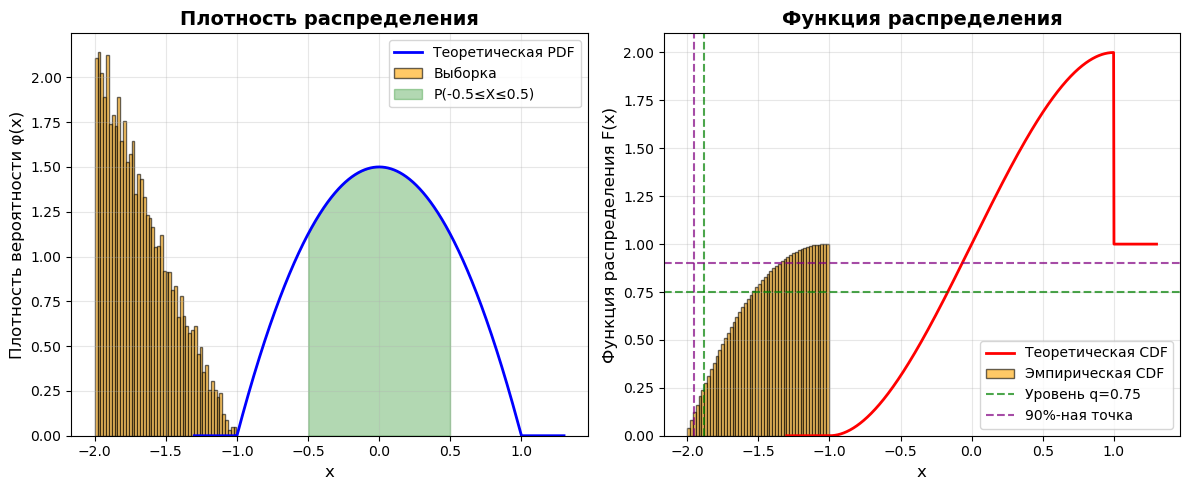

ДОПОЛНИТЕЛЬНАЯ ПРОВЕРКА
Медиана (0.5-квантиль): -1.732051
25%-квантиль: -1.532089
75%-квантиль: -1.879385
90%-квантиль: -1.954166

СРАВНЕНИЕ ТЕОРЕТИЧЕСКИХ И ВЫБОРОЧНЫХ ХАРАКТЕРИСТИК
Характеристика                 Теоретическое   Выборочное     
------------------------------------------------------------
Среднее                        0.000000        -1.683423      
Дисперсия                      0.200000        0.052240       
Асимметрия                     0.000000        0.636342       
Эксцесс                        -0.600000       -0.465334      

ПРОВЕРКА ГРАНИЧНЫХ УСЛОВИЙ
F(-1) = 0.000000
F(1) = 1.000000
φ(-1) = 0.000000
φ(1) = 0.000000
φ(0) (максимум) = 1.500000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate

class CustomDistribution(rv_continuous):
    def __init__(self):
        super().__init__(a=-1, b=1, name='custom_parabolic')
    
    def _pdf(self, x):
        x = np.asarray(x)
        result = np.zeros_like(x, dtype=float)
        mask = (x >= self.a) & (x <= self.b)
        result[mask] = 1.5 * (1 - x[mask]**2)
        return result
    
    def _cdf(self, x):
        x = np.asarray(x)
        result = np.zeros_like(x, dtype=float)
        
        # x < -1
        result[x < self.a] = 0
        
        # -1 <= x <= 1
        mask = (x >= self.a) & (x <= self.b)
        if np.any(mask):
            result[mask] = 1.5 * (x[mask] - x[mask]**3/3 + 2/3)
        
        # x > 1
        result[x > self.b] = 1
        
        return result
    
    def _ppf(self, q):
        q = np.asarray(q)
        result = np.zeros_like(q, dtype=float)
        
        for i in range(len(q)):
            qi = q[i]
            if qi <= 0:
                result[i] = -1
            elif qi >= 1:
                result[i] = 1
            else:
                p = -3
                q_coef = 4*qi - 2
                
                theta = np.arccos(-q_coef / 2 * np.sqrt(-27/(p**3)))
                result[i] = 2 * np.sqrt(-p/3) * np.cos((theta + 2*np.pi)/3)
        
        return result
    
    def _stats(self):
        mean = 0.0 
        variance = 0.2 
        skewness = 0.0 
        kurtosis = -0.6  
        return mean, variance, skewness, kurtosis

custom_dist = CustomDistribution()

# Проверка нормировки плотности
a, b = -1, 1

def pdf_func(x):
    if x < a or x > b:
        return 0
    return 1.5 * (1 - x**2)

integral, error = integrate.quad(pdf_func, a, b)
print("="*50)
print("ПРОВЕРКА НОРМИРОВКИ ПЛОТНОСТИ")
print("="*50)
print(f"∫ φ(x) dx на [{a}, {b}] = {integral:.10f}")
print(f"Ошибка интегрирования: {error:.2e}")
print(f"Условие нормировки выполнено: {abs(integral - 1) < 1e-10}")
print()

# Генерация выборки
np.random.seed(42)
sample = custom_dist.rvs(size=10000)
print("ГЕНЕРАЦИЯ ВЫБОРКИ")
print(f"Размер выборки: {len(sample)}")
print(f"Первые 10 значений: {sample[:10].round(4)}")
print()

# Вероятность попадания в интервал
interval = [-0.5, 0.5]
prob = custom_dist.cdf(interval[1]) - custom_dist.cdf(interval[0])
print("ВЕРОЯТНОСТЬ ПОПАДАНИЯ В ИНТЕРВАЛ")
print(f"P({interval[0]} ≤ X ≤ {interval[1]}) = {prob:.6f}")
print()

# Числовые характеристики
print("ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ")
print("="*50)
print(f"Математическое ожидание: {custom_dist.mean():.6f}")
print(f"Дисперсия: {custom_dist.var():.6f}")
print(f"Среднее квадратическое отклонение: {custom_dist.std():.6f}")

# Вычисление асимметрии и эксцесса через stats
stats_result = custom_dist.stats(moments='mvsk')
print(f"Коэффициент асимметрии: {stats_result[2]:.6f}")
print(f"Эксцесс: {stats_result[3]:.6f}")
print()

# Квантили и процентили
q = 0.75  # уровень квантиля
p = 90    # процент для p%-ной точки
quantile_q = custom_dist.ppf(q)
percentile_p = custom_dist.ppf(1-p/100)
print("КВАНТИЛИ И ПРОЦЕНТИЛИ")
print(f"{q}-квантиль (Q{q}): {quantile_q:.6f}")
print(f"{p}%-ная точка: {percentile_p:.6f}")
print()

# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# График плотности
x_plot = np.linspace(a - 0.3, b + 0.3, 1000)
pdf_values = custom_dist.pdf(x_plot)

axes[0].plot(x_plot, pdf_values, 'b-', linewidth=2, label='Теоретическая PDF')
axes[0].hist(sample, bins=50, density=True, alpha=0.6, color='orange', 
            edgecolor='black', label='Выборка')
axes[0].fill_between(x_plot, 0, pdf_values, 
                     where=(x_plot >= interval[0]) & (x_plot <= interval[1]), 
                     alpha=0.3, color='green', 
                     label=f'P({interval[0]}≤X≤{interval[1]})')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('Плотность вероятности φ(x)', fontsize=12)
axes[0].set_title('Плотность распределения', fontsize=14, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# График функции распределения
cdf_values = custom_dist.cdf(x_plot)

axes[1].plot(x_plot, cdf_values, 'r-', linewidth=2, label='Теоретическая CDF')
axes[1].hist(sample, bins=50, density=True, cumulative=True, alpha=0.6, 
             color='orange', edgecolor='black', label='Эмпирическая CDF')
axes[1].axhline(y=q, color='g', linestyle='--', alpha=0.7, label=f'Уровень q={q}')
axes[1].axvline(x=quantile_q, color='g', linestyle='--', alpha=0.7)
axes[1].axhline(y=p/100, color='purple', linestyle='--', alpha=0.7, label=f'{p}%-ная точка')
axes[1].axvline(x=percentile_p, color='purple', linestyle='--', alpha=0.7)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('Функция распределения F(x)', fontsize=12)
axes[1].set_title('Функция распределения', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Проверка вычислений
print("ДОПОЛНИТЕЛЬНАЯ ПРОВЕРКА")
print("="*50)
print(f"Медиана (0.5-квантиль): {custom_dist.median():.6f}")
print(f"25%-квантиль: {custom_dist.ppf(0.25):.6f}")
print(f"75%-квантиль: {custom_dist.ppf(0.75):.6f}")
print(f"90%-квантиль: {custom_dist.ppf(0.9):.6f}")
print()

# Сравнение теоретических и выборочных характеристик
print("СРАВНЕНИЕ ТЕОРЕТИЧЕСКИХ И ВЫБОРОЧНЫХ ХАРАКТЕРИСТИК")
print("="*50)
print(f"{'Характеристика':<30} {'Теоретическое':<15} {'Выборочное':<15}")
print("-"*60)
print(f"{'Среднее':<30} {custom_dist.mean():<15.6f} {np.mean(sample):<15.6f}")
print(f"{'Дисперсия':<30} {custom_dist.var():<15.6f} {np.var(sample):<15.6f}")

# Вычисление выборочной асимметрии и эксцесса
from scipy.stats import skew, kurtosis
sample_skew = skew(sample)
sample_kurtosis = kurtosis(sample, fisher=True)  # Fisher's definition (normal -> 0)

print(f"{'Асимметрия':<30} {stats_result[2]:<15.6f} {sample_skew:<15.6f}")
print(f"{'Эксцесс':<30} {stats_result[3]:<15.6f} {sample_kurtosis:<15.6f}")
print()

# Дополнительная проверка граничных условий
print("ПРОВЕРКА ГРАНИЧНЫХ УСЛОВИЙ")
print("="*50)
print(f"F({a}) = {custom_dist.cdf(a):.6f}")
print(f"F({b}) = {custom_dist.cdf(b):.6f}")
print(f"φ({a}) = {custom_dist.pdf(a):.6f}")
print(f"φ({b}) = {custom_dist.pdf(b):.6f}")
print(f"φ(0) (максимум) = {custom_dist.pdf(0):.6f}")